<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [836]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [837]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

## EDA

In [838]:
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [839]:
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [840]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [841]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [842]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [843]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## Data Preprocessing

In [844]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [845]:
# Convert string to datatime and create Hour, Month and Day
train["datetime"] = pd.to_datetime(train["datetime"])
train["Hour"] = train["datetime"].apply(lambda x: x.hour)
train["Month"] = train["datetime"].apply(lambda x: x.month)
train["Day"] = train["datetime"].apply(lambda x: x.dayofweek)
train.drop(["datetime"], axis=1, inplace=True)

test["datetime"] = pd.to_datetime(test["datetime"])
test["Hour"] = test["datetime"].apply(lambda x: x.hour)
test["Month"] = test["datetime"].apply(lambda x: x.month)
test["Day"] = test["datetime"].apply(lambda x: x.dayofweek)
test.drop(["datetime"], axis=1, inplace=True)

In [846]:
test.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
Hour          0
Month         0
Day           0
dtype: int64

In [847]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5


In [848]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Hour,Month,Day
0,1,0,1,1,10.66,11.365,56,26.0027,0,1,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,1,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,1,3


In [849]:
# One-hot encoding
train = pd.get_dummies(train, columns=["season", "weather", "Hour", "Month", "Day"])
test = pd.get_dummies(test, columns=["season", "weather", "Hour", "Month", "Day"])

In [850]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   atemp       10886 non-null  float64
 4   humidity    10886 non-null  int64  
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
 9   season_1    10886 non-null  uint8  
 10  season_2    10886 non-null  uint8  
 11  season_3    10886 non-null  uint8  
 12  season_4    10886 non-null  uint8  
 13  weather_1   10886 non-null  uint8  
 14  weather_2   10886 non-null  uint8  
 15  weather_3   10886 non-null  uint8  
 16  weather_4   10886 non-null  uint8  
 17  Hour_0      10886 non-null  uint8  
 18  Hour_1      10886 non-null  uint8  
 19  Hour_2      10886 non-nul

In [851]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     6493 non-null   int64  
 1   workingday  6493 non-null   int64  
 2   temp        6493 non-null   float64
 3   atemp       6493 non-null   float64
 4   humidity    6493 non-null   int64  
 5   windspeed   6493 non-null   float64
 6   season_1    6493 non-null   uint8  
 7   season_2    6493 non-null   uint8  
 8   season_3    6493 non-null   uint8  
 9   season_4    6493 non-null   uint8  
 10  weather_1   6493 non-null   uint8  
 11  weather_2   6493 non-null   uint8  
 12  weather_3   6493 non-null   uint8  
 13  weather_4   6493 non-null   uint8  
 14  Hour_0      6493 non-null   uint8  
 15  Hour_1      6493 non-null   uint8  
 16  Hour_2      6493 non-null   uint8  
 17  Hour_3      6493 non-null   uint8  
 18  Hour_4      6493 non-null   uint8  
 19  Hour_5      6493 non-null  

## Strorytelling - Visualization

In [852]:
corr = train.corr()
corr.shape

(60, 60)

<AxesSubplot:>

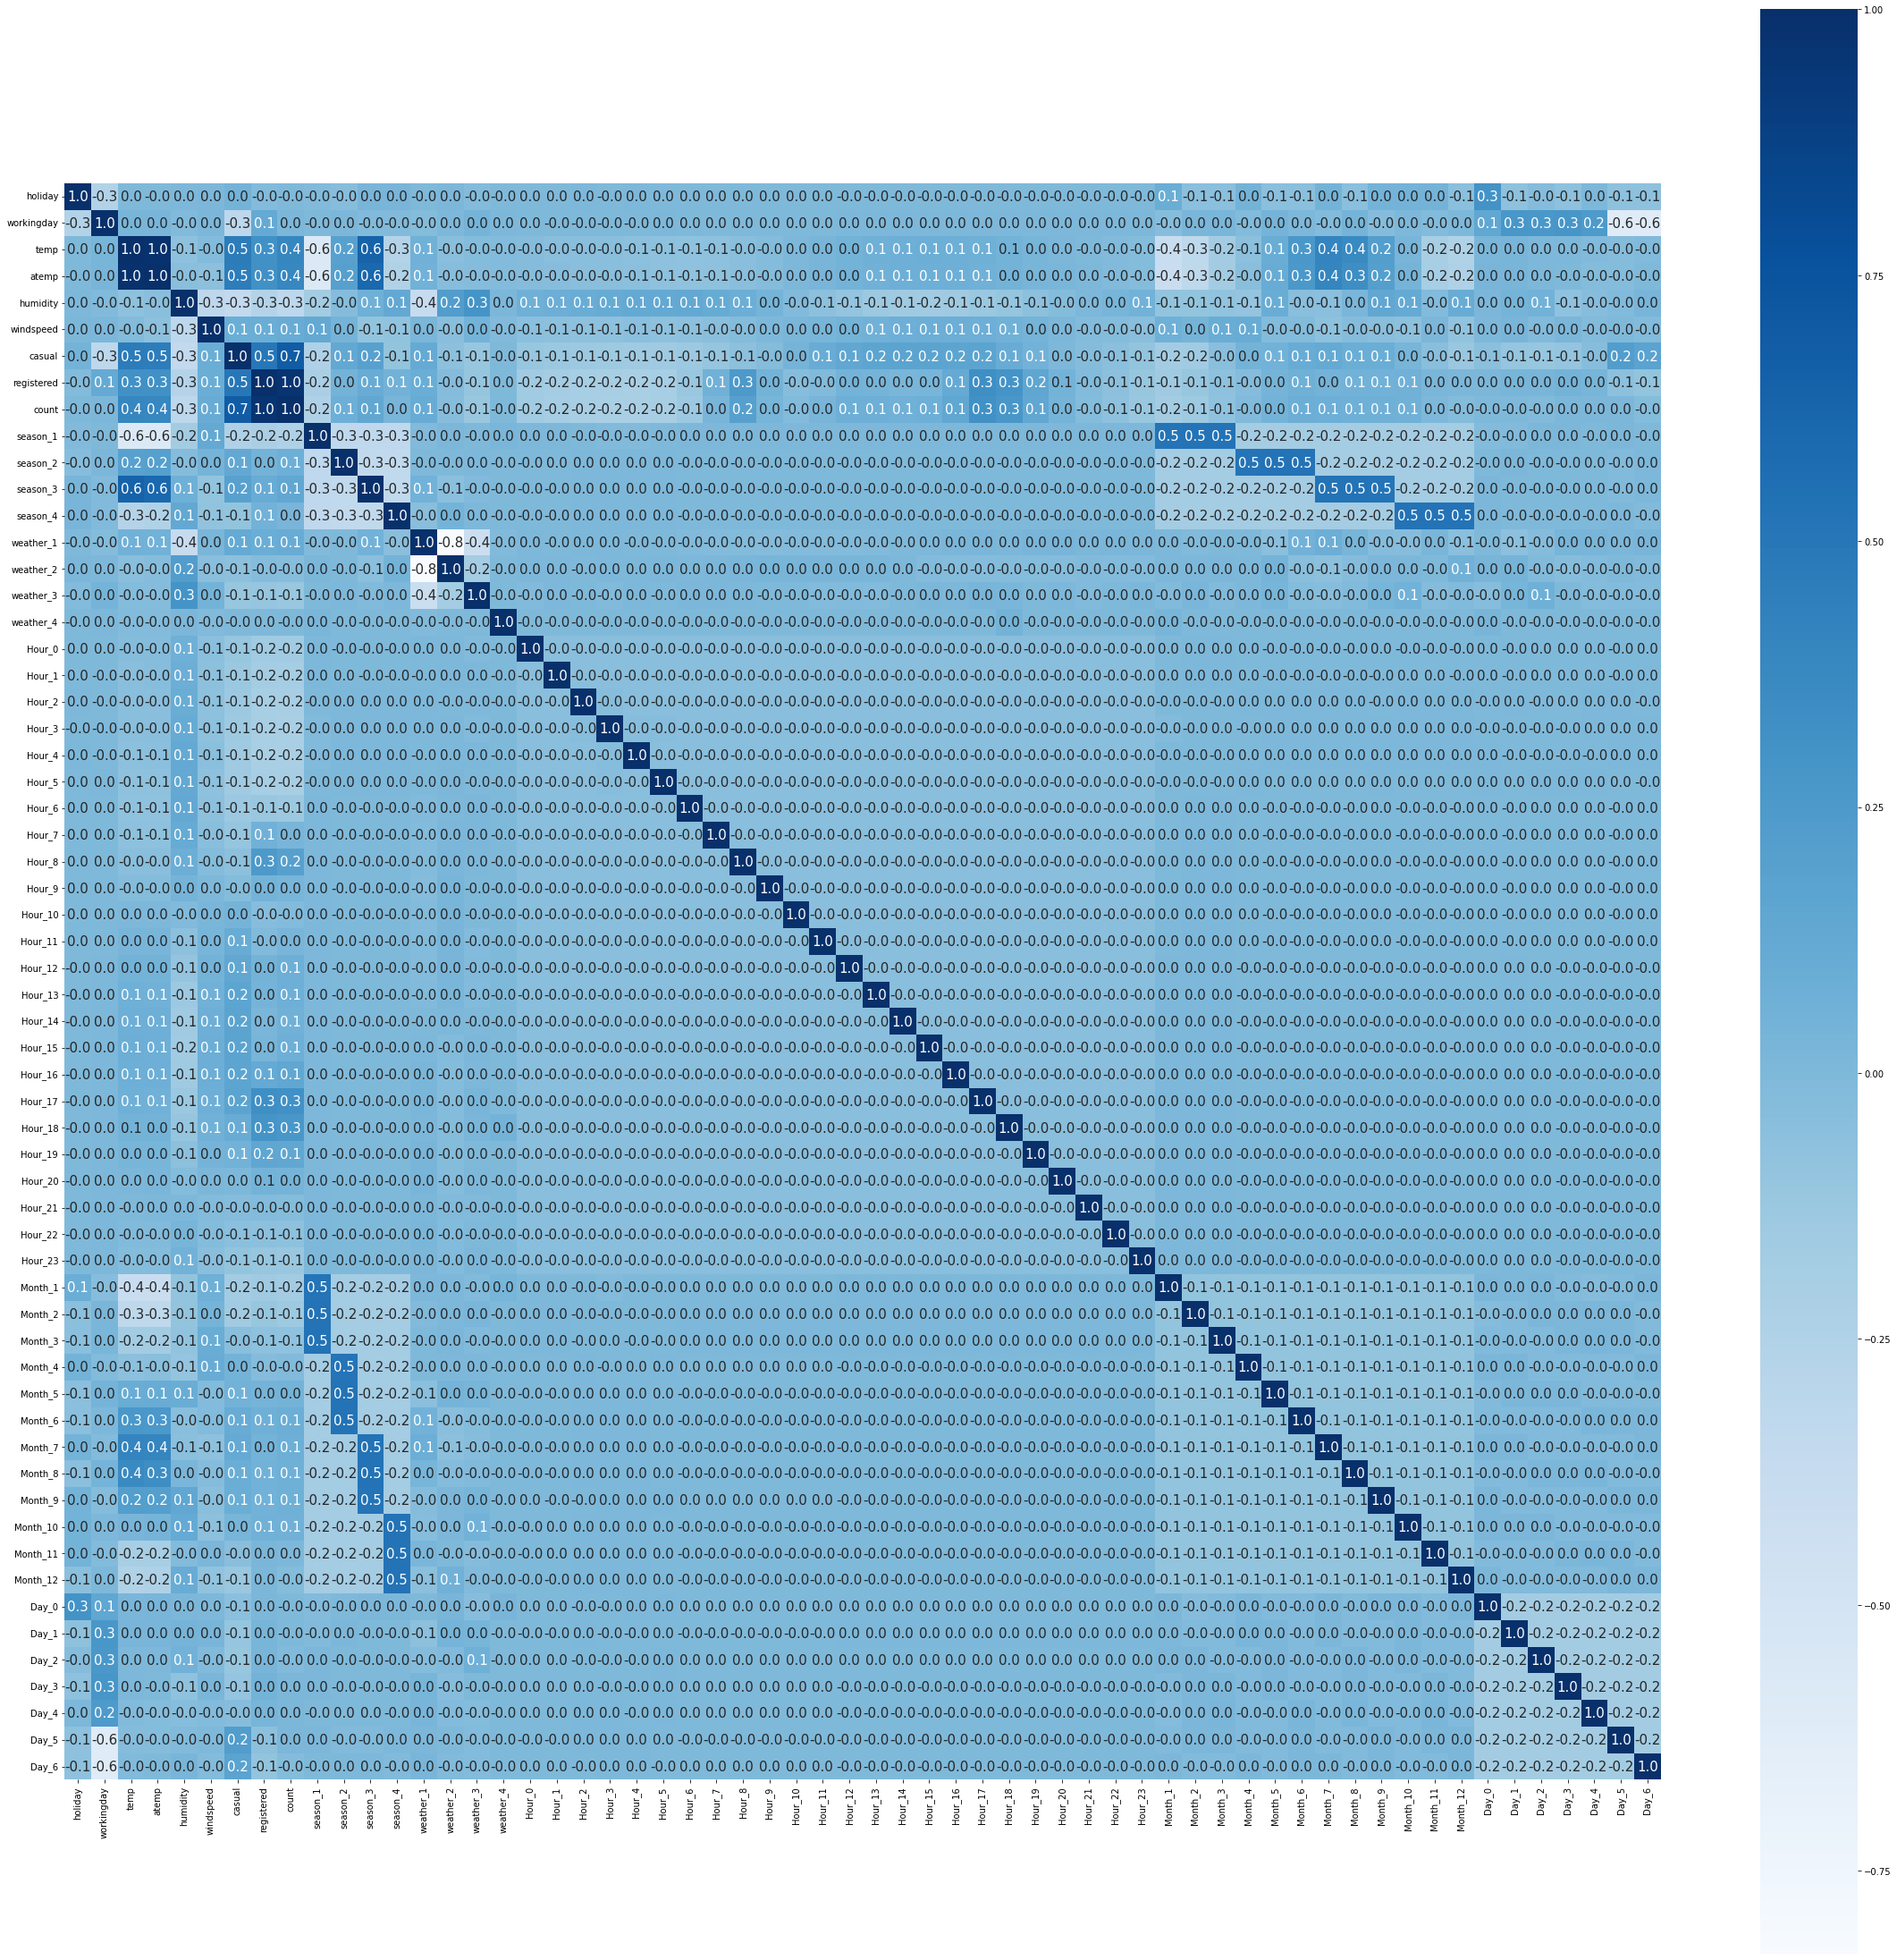

In [853]:
plt.figure(figsize=(40, 40))
sns.heatmap(
    corr,
    cbar=True,
    square=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 15},
    cmap="Blues",
)

## Train your model (Regression)

In [854]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [855]:
y_train = train["count"]
x_train = train.drop(["casual", "registered", "count"], axis=1)

In [856]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

#### RandomForest Regression

In [857]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_tr, y_tr)
pred_rf = model_rf.predict(X_tr)
print(pred_rf)

[304.09 798.25  90.01 ... 586.61 128.84 399.33]


<AxesSubplot:xlabel='count', ylabel='Count'>

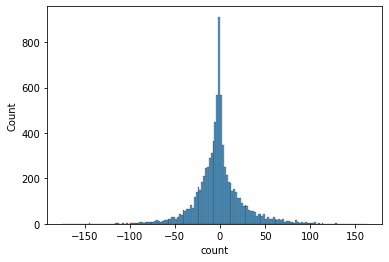

In [858]:
sns.histplot(y_tr - pred_rf)

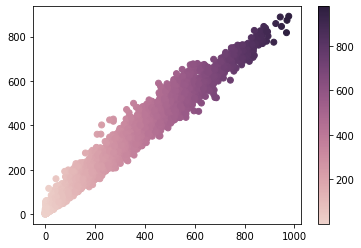

In [859]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_tr, pred_rf, c=y_tr, cmap=map)
f.colorbar(points)
plt.show()

In [860]:
print("R2 Score:", metrics.r2_score(y_tr, pred_rf))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_tr, pred_rf))
print("Mean Squared Error:", metrics.mean_squared_error(y_tr, pred_rf))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_tr, pred_rf)))

R2 Score: 0.9777827134597593
Mean Absolute Error: 17.808714127129953
Mean Squared Error: 726.5893278091492
Root Mean Squared Error: 26.955320955409697


#### Linear Regression

In [861]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

# Selecting only one feature (temp column) since the model is linear
X_tr_lr = X_tr["temp"]
X_tr_lr = X_tr_lr.values.reshape(-1, 1)

X_val_lr = X_val["temp"]
X_val_lr = X_val_lr.values.reshape(-1, 1)

y_tr_lr = y_tr.values.reshape(-1, 1)
y_val_lr = y_val.values.reshape(-1, 1)

model_lr.fit(X_tr_lr, y_tr_lr)
pred_lr = model_lr.predict(X_tr_lr)
print(pred_lr)

[[269.22296852]
 [314.32697446]
 [118.87628205]
 ...
 [254.18829988]
 [141.42828502]
 [314.32697446]]


<AxesSubplot:ylabel='Count'>

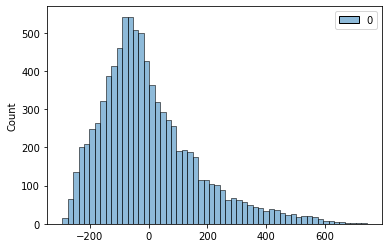

In [862]:
sns.histplot(y_tr_lr - pred_lr)

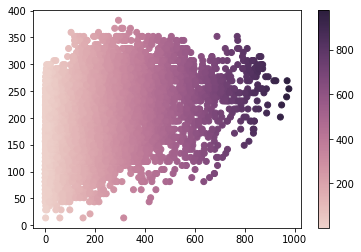

In [863]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_tr, pred_lr, c=y_tr, cmap=map)
f.colorbar(points)
plt.show()

In [864]:
print("R2 Score:", metrics.r2_score(y_tr_lr, pred_lr))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_tr_lr, pred_lr))
print("Mean Squared Error:", metrics.mean_squared_error(y_tr_lr, pred_lr))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_tr_lr, pred_lr)))

R2 Score: 0.1552300131964599
Mean Absolute Error: 126.64924527073804
Mean Squared Error: 27627.17471160093
Root Mean Squared Error: 166.2142434077204


#### Multiple Regression

In [865]:
model_mlr = LinearRegression()
model_mlr.fit(X_tr, y_tr)
pred_mlr = model_mlr.predict(X_tr)
print(pred_mlr)

[326.34912109 521.38671875  49.80908203 ... 308.734375   197.46484375
 510.09423828]


<AxesSubplot:xlabel='count', ylabel='Count'>

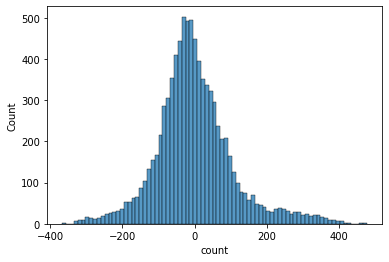

In [866]:
sns.histplot(y_tr - pred_mlr)

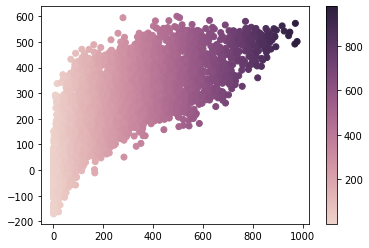

In [867]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_tr, pred_mlr, c=y_tr, cmap=map)
f.colorbar(points)
plt.show()

In [868]:
print("R2 Score:", metrics.r2_score(y_tr, pred_mlr))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_tr, pred_mlr))
print("Mean Squared Error:", metrics.mean_squared_error(y_tr, pred_mlr))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_tr, pred_mlr)))

R2 Score: 0.6411569711638037
Mean Absolute Error: 78.48891279705084
Mean Squared Error: 11735.524706801883
Root Mean Squared Error: 108.3306268180974


In [869]:
print(model_mlr.intercept_)
print(model_mlr.coef_)

3705045169853.7524
[ 1.46163073e+09  1.46163074e+09  5.91525418e+00  9.25603688e-01
 -1.10100213e+00 -9.63200212e-01 -1.85873399e+11 -9.27215133e+11
 -1.74899231e+12 -4.34266163e+11 -1.50858229e+11 -1.50858229e+11
 -1.50858229e+11 -1.50858229e+11 -6.61272110e+10 -6.61272110e+10
 -6.61272110e+10 -6.61272110e+10 -6.61272110e+10 -6.61272110e+10
 -6.61272110e+10 -6.61272108e+10 -6.61272107e+10 -6.61272108e+10
 -6.61272109e+10 -6.61272109e+10 -6.61272108e+10 -6.61272108e+10
 -6.61272109e+10 -6.61272108e+10 -6.61272108e+10 -6.61272106e+10
 -6.61272107e+10 -6.61272108e+10 -6.61272108e+10 -6.61272109e+10
 -6.61272109e+10 -6.61272110e+10 -4.30592516e+11 -4.30592516e+11
 -4.30592516e+11  3.10749218e+11  3.10749218e+11  3.10749218e+11
  1.13252640e+12  1.13252640e+12  1.13252640e+12 -1.82199752e+11
 -1.82199752e+11 -1.82199752e+11 -2.87305545e+12 -2.87305545e+12
 -2.87305545e+12 -2.87305545e+12 -2.87305545e+12 -2.87159381e+12
 -2.87159381e+12]


In [870]:
coeffcients = pd.DataFrame([X_tr.columns,model_mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,holiday,1461630732.21938
1,workingday,1461630737.211112
2,temp,5.915254
3,atemp,0.925604
4,humidity,-1.101002
5,windspeed,-0.9632
6,season_1,-185873399133.758362
7,season_2,-927215132625.393188
8,season_3,-1748992310189.989258
9,season_4,-434266162712.714783


#### KNN Regression

In [871]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=2)
model_knn.fit(X_tr, y_tr)
pred_knn = model_knn.predict(X_tr)
print(pred_knn)

[330.5 622.5 121.5 ... 592.5 194.5 471. ]


<AxesSubplot:xlabel='count', ylabel='Count'>

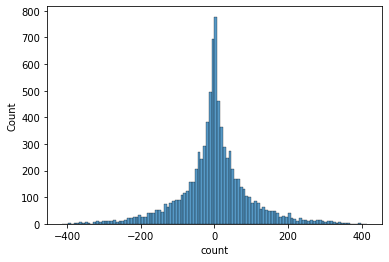

In [872]:
sns.histplot(y_tr - pred_knn)

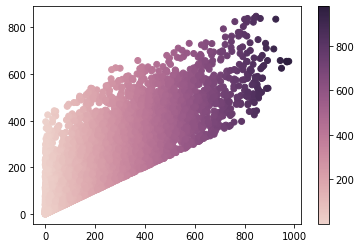

In [873]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_tr, pred_knn, c=y_tr, cmap=map)
f.colorbar(points)
plt.show()

In [874]:
print("R2 Score:", metrics.r2_score(y_tr, pred_knn))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_tr, pred_knn))
print("Mean Squared Error:", metrics.mean_squared_error(y_tr, pred_knn))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_tr, pred_knn)))

R2 Score: 0.7223347534563312
Mean Absolute Error: 64.20067753789618
Mean Squared Error: 9080.70409393661
Root Mean Squared Error: 95.29272844208319


#### Decision Tree Regressor

In [875]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(X_tr, y_tr)
pred_tree = model_tree.predict(X_tr)
print(pred_tree)

[257. 865.  96. ... 617. 132. 383.]


<AxesSubplot:xlabel='count', ylabel='Count'>

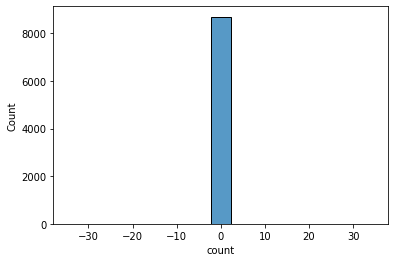

In [876]:
sns.histplot(y_tr - pred_tree)

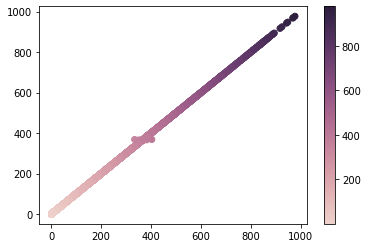

In [877]:
map = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(y_tr, pred_tree, c=y_tr, cmap=map)
f.colorbar(points)
plt.show()

In [878]:
print("R2 Score:", metrics.r2_score(y_tr, pred_tree))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_tr, pred_tree))
print("Mean Squared Error:", metrics.mean_squared_error(y_tr, pred_tree))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_tr, pred_tree)))

R2 Score: 0.9999896096890128
Mean Absolute Error: 0.01423977951309141
Mean Squared Error: 0.33980248047772166
Root Mean Squared Error: 0.5829257932856649


#### So far, it's obvious that Decision Tree is the best model for this problem and RandomForest is the second best. This can be seen in the provided sample test results below as well (Predicted values are closer in these two models overall).

## Test Result

In [909]:
# Random Forest Regressor
pred_y_rf = model_rf.predict(test)
pred_y_rf = pred_y_rf.reshape(-1, 1).tolist()

# if you want to save in the file, use the following code
# output = pd.DataFrame({'count': pred_y_rf})
# output.head()
# output.to_csv('submission.csv', index=False)

# Linear Regression
pred_y_lr = model_lr.predict(test["temp"].values.reshape(-1, 1)) # Selecting only one feature (temp column) since the model is linear
pred_y_lr = pred_y_lr.reshape(-1, 1).tolist()

# Multiple Linear Regression
pred_y_mlr = model_mlr.predict(test)
pred_y_mlr = pred_y_mlr.reshape(-1, 1).tolist()

# KNN Regression
pred_y_knn = model_knn.predict(test)
pred_y_knn = pred_y_knn.reshape(-1, 1).tolist()

# Decision Tree Regressor
pred_y_tree = model_tree.predict(test)
pred_y_tree = pred_y_tree.reshape(-1, 1).tolist()

# Create a dataframe from the predictions
preds = pd.DataFrame({"Random Forest Regressor": pred_y_rf, "Linear Regression": pred_y_lr, "Multiple Linear Regression": pred_y_mlr, "KNN Regression": pred_y_knn, "Decision Tree Regressor": pred_y_tree})

random_rows = np.random.choice(preds.index, size=10)
preds.loc[random_rows]

,Random Forest Regressor,Linear Regression,Multiple Linear Regression,KNN Regression,Decision Tree Regressor
3069,[208.23],[118.87628205076834],[248392763769.15967],[132.5],[70.0]
5140,[28.41],[231.63629690479382],[49.53564453125],[37.0],[17.0]
4274,[138.10666666666665],[194.0496252867853],[167.28564453125],[405.0],[158.0]
5290,[15.47],[239.1536312283955],[73.36865234375],[36.0],[3.0]
6089,[16.73],[81.28961043275983],[11.22900390625],[20.5],[11.0]
195,[60.28],[73.77227610915814],[134.24755859375],[52.0],[20.0]
2753,[74.56],[171.4976223159802],[97.93017578125],[70.0],[112.0]
1121,[638.32],[269.2229685228023],[530.82470703125],[248.0],[678.0]
5862,[39.15],[194.0496252867853],[64.359375],[233.0],[17.0]
1833,[350.24],[306.80964014081076],[309.91845703125],[375.0],[242.0]


## Send us the Result (Maktabkhoone)